In [8]:
import numpy as np
import timeit
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
## ALL MAIN ARGUMENTS FOR THE SCRIPT ##

dat_folder = 'Data/'
img_folder = 'Selected_Data/images/'


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob

t = pd.read_csv(dat_folder + 'all_data_info.csv')

# filter down (if needed)
if (filter_subset):
    t = t[t['new_filename'].str.startswith('1')]
    t = t[t['in_train']]

t.head()
# print(t.shape)

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [7]:
temp = t['artist'].value_counts()
artists = temp[temp >= num_samples].index.tolist()

ta = t[t['artist'].isin(artists)]

art_style = ta[['artist', 'style']]
art_style = art_style.sort_values(['artist'])
art_style = art_style.drop_duplicates()
print(art_style)

                           artist                       style
10527            Albert Bierstadt                 Romanticism
31932            Albert Bierstadt                    Luminism
51363            Albert Bierstadt                     Realism
2517               Albrecht Durer        Northern Renaissance
5611               Albrecht Durer                         NaN
5187                Alfred Sisley               Impressionism
5219                Alfred Sisley                     Realism
36662               Alfred Sisley          Post-Impressionism
5933            Amedeo Modigliani               Expressionism
44626             Boris Kustodiev        Art Nouveau (Modern)
54781             Boris Kustodiev           Socialist Realism
51093             Boris Kustodiev                     Realism
55060             Boris Kustodiev     Naïve Art (Primitivism)
53335             Boris Kustodiev               Impressionism
7231              Boris Kustodiev                         NaN
47867   

# Initial Look at the images

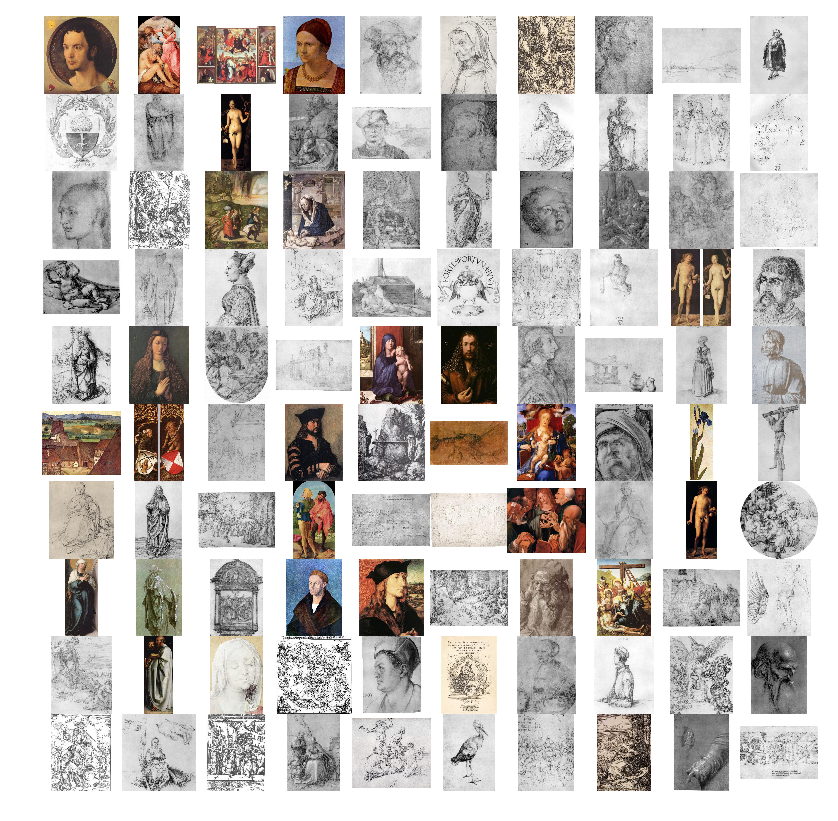

In [9]:
image_files = [f for f in glob.glob("Selected_Data/images/*")]
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in image_files[:100]:
    im = cv2.imread(l)
   #  im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# No of paintings per style

1 loop, best of 3: 225 ms per loop


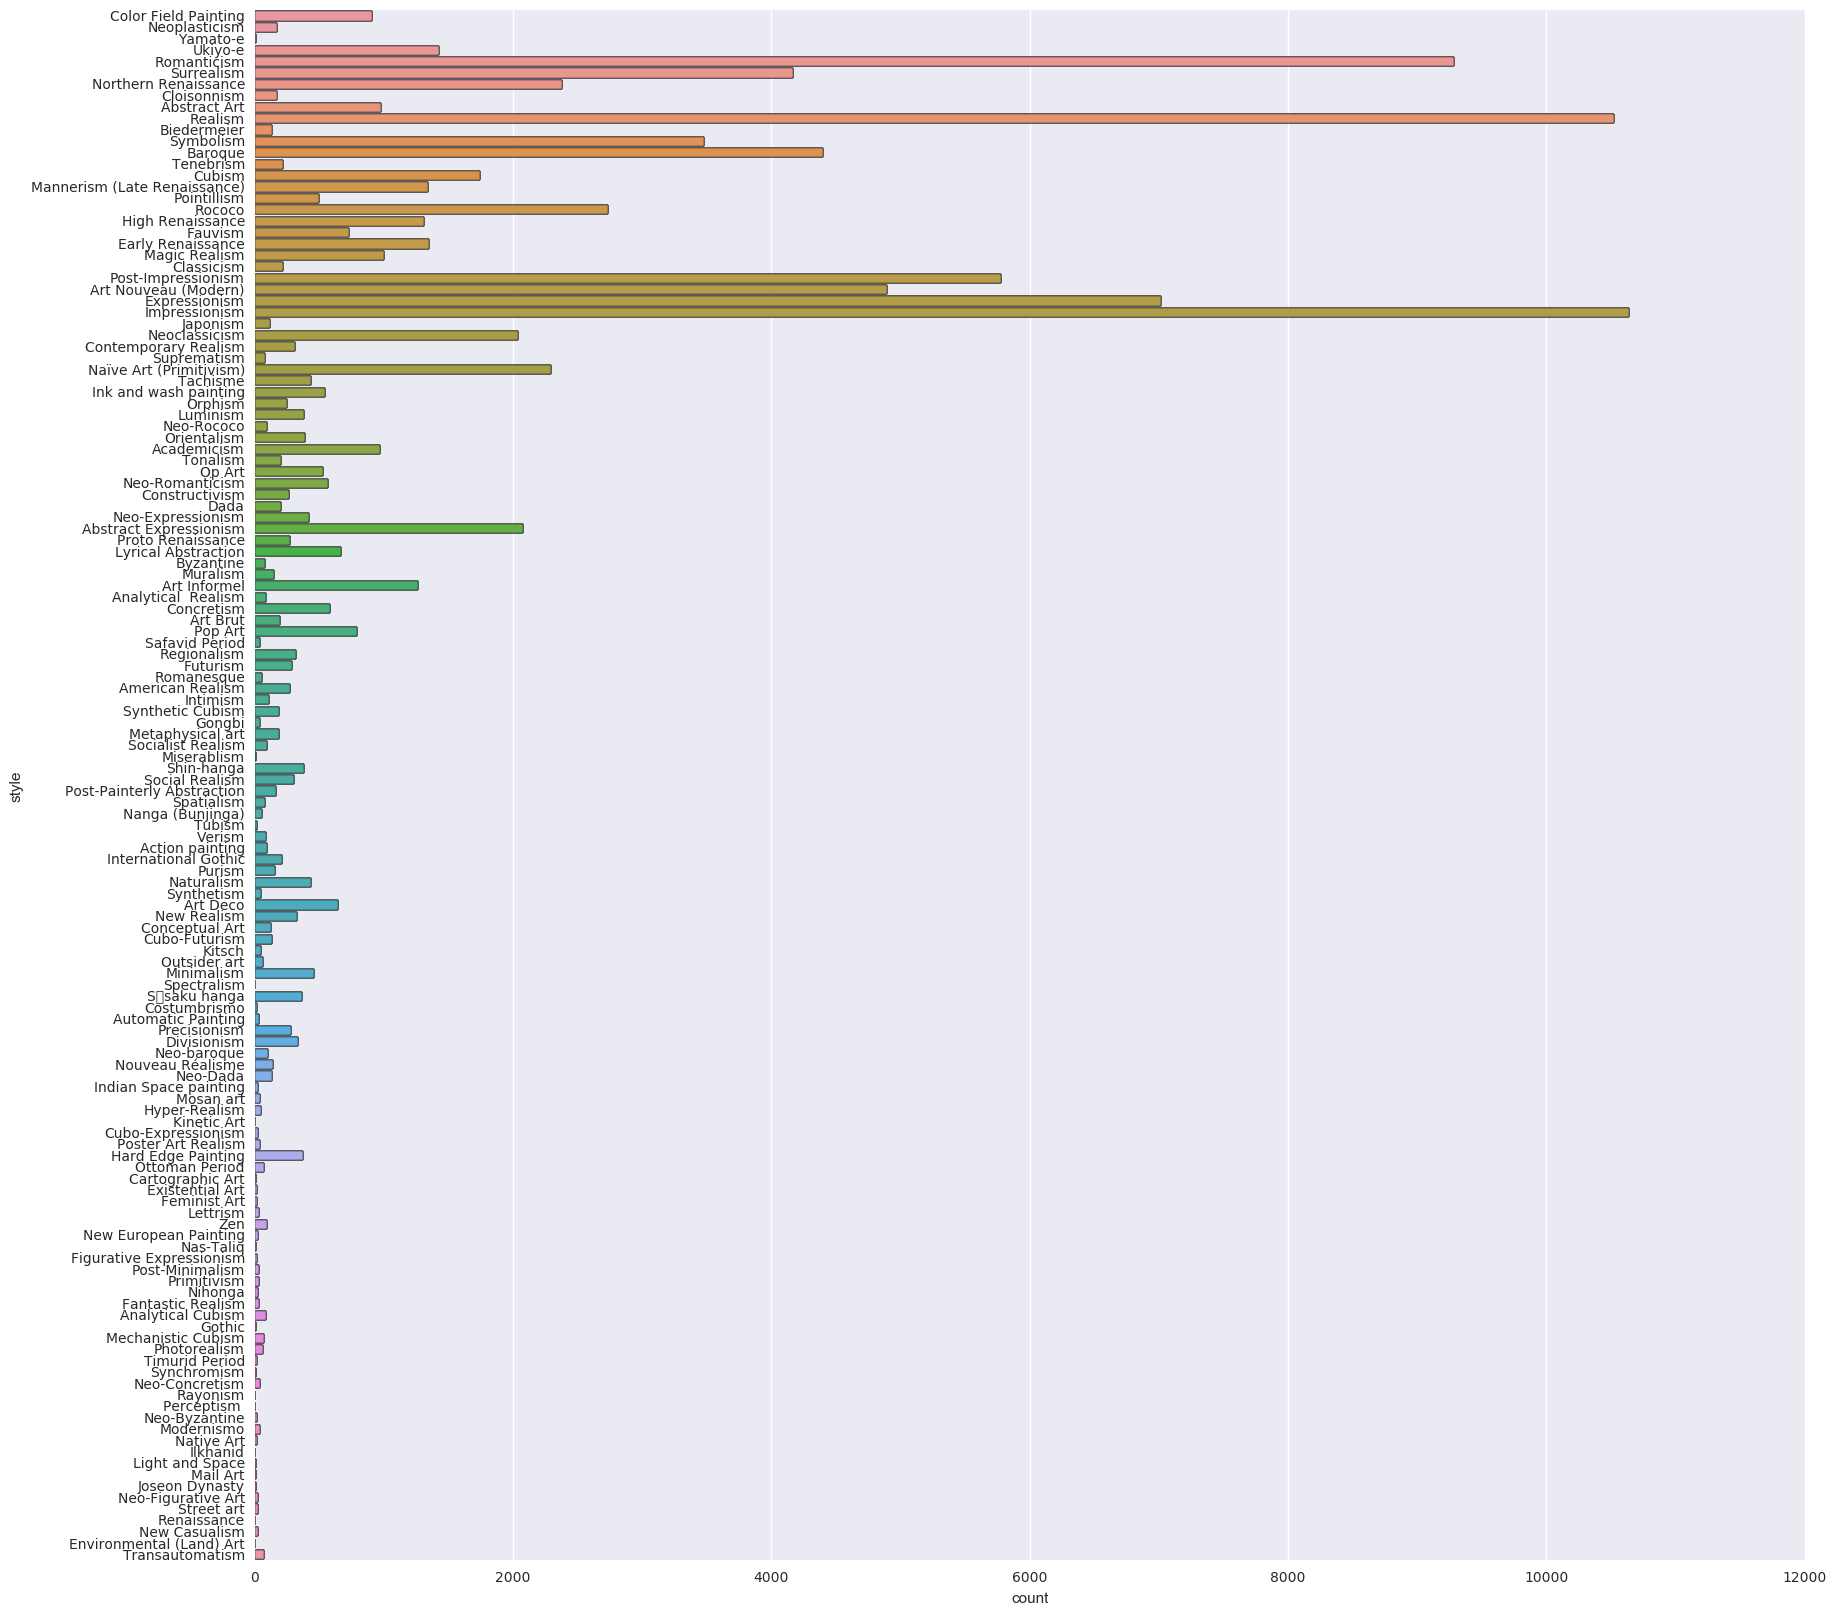

In [30]:
import seaborn as sns
plt.figure(figsize=(20,20))
%timeit sns.countplot(y="style", data=t)

# No of paintings by artists

In [34]:
#Selecting only top 100 artists and their paintings.

n_artist = t['artist'].value_counts().head(100)
d1=pd.Series(n_artist.index)
df_artist = pd.DataFrame(data=d1,columns=['artist'],index=range(len(d1)))
t = t.merge(df_artist)

1 loop, best of 3: 198 ms per loop


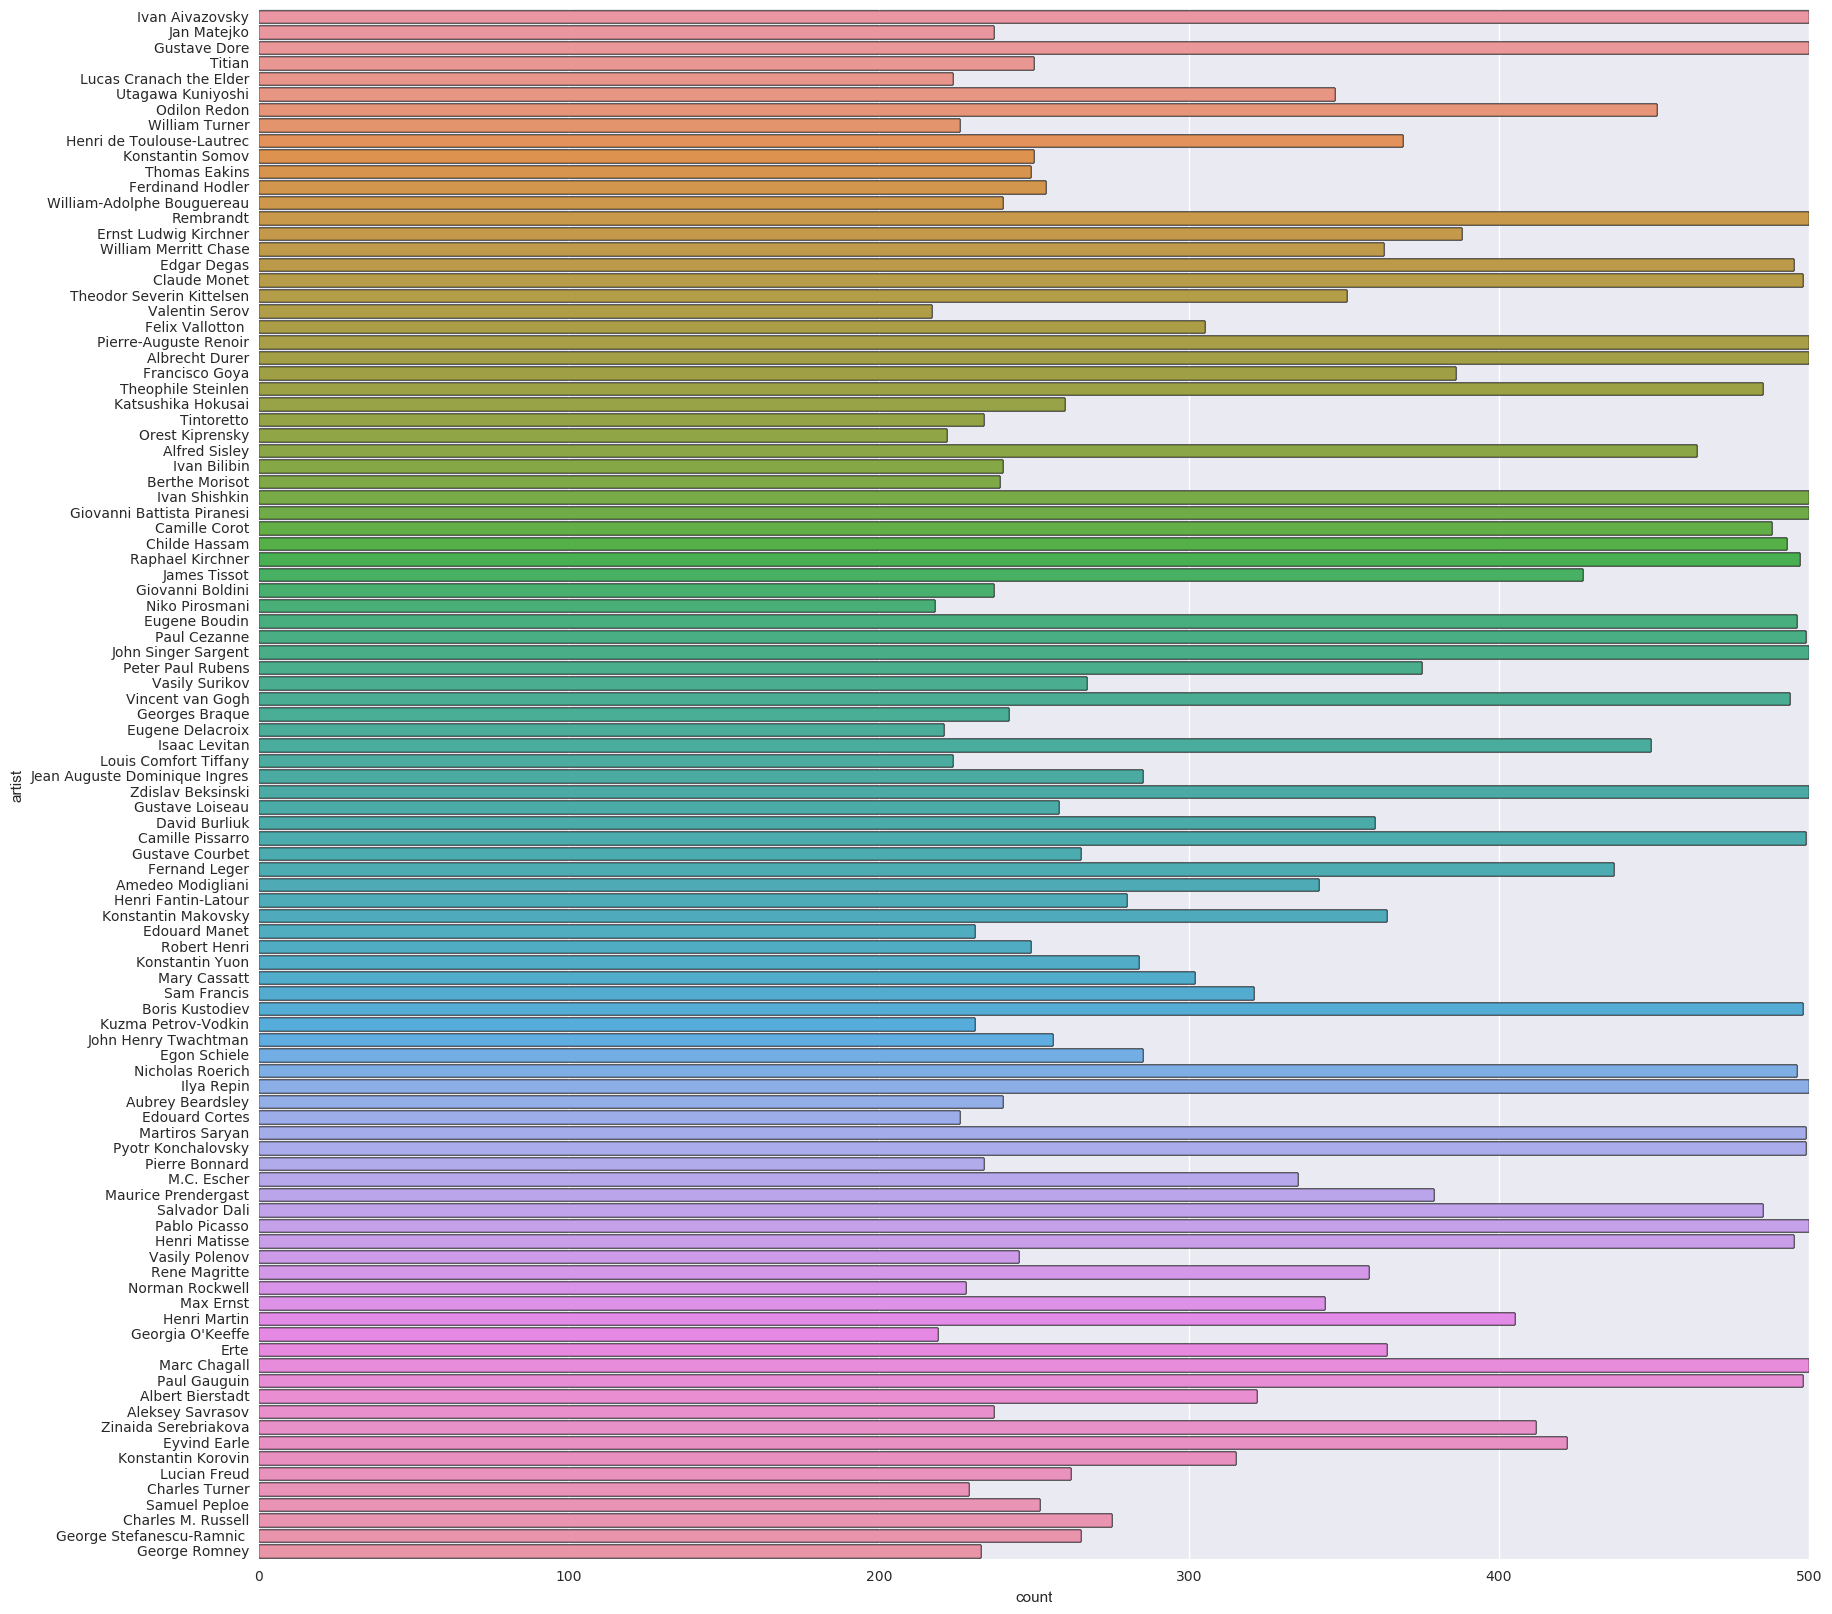

In [35]:
plt.figure(figsize=(20,20))
%timeit sns.countplot(y="artist", data=t)